금일 실습은  
**머신러닝의 본질을 관통하는 철학과 그 과정을 깊게 파고들며 이해해보는 것**  


In [ ]:
#실습모듈 부르기
from IPython.display import display, Image


## 학습 전제
----
- numpy, pandas, matplotlib 등의 라이브러리를 자유롭게 활용할 수 있다.
- 원핫인코딩 등의 간단한 데이터 전처리 방식의 개념에 대해 알고있다.
- 고등 수학 과정 중 도함수의 정의와 미분계수 수식, 그리고 간단한 미분 공식을 알고 있다.
- 머신러닝의 개념과 그 패러다임에 관해 학습해본 적이 있으며, 낯설지 않다.
  
  
## 학습 목표
----
- 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction 각각의 개념을 알고, y에 가까운 prediction을 낼 수 있도록 학습한다는 철학을 이해한다.
- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류와 구현을 익힌다.
- 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행해본다.
- 손실함수를 정의하고 경사하강법을 활용해 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익힌다.
- sklearn의 LinearRegression을 활용해 빠르고 간편하게 선형 회귀 하는 방법을 익힌다.  


## 목차
----
#### Step 1. 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기  
    (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기  
    (2) "모델"을 세운다는 것, 그에 대한 의미 이해하기  
    (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기  
    (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!  
    (5) 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!  
    
    
#### Step 2. 이번엔 하나가 아니다! 다양한 정보로 원하는 값을 예측해 보기  
    (1) 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?  
    (2) 다시 한번 직접 설계해 보는 손실함수  
    (3) 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기  
    (4) 모두 준비 되었다면, 모델 학습은 간단하죠!  
    (5) 지금까지 한 모든 과정을, 라이브러리로 깔끔하게    
    
#### 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!  
    (1) 데이터 가져오기  
    (2) 모델에 입력할 데이터 X 준비하기  
    (3) 모델에 예측할 데이터 y 준비하기  
    (4) train 데이터와 test 데이터로 분리하기  
    (5) 모델 준비하기  
    (6) 손실함수 loss 정의하기  
    (7) 기울기를 구하는 gradient 함수 구현하기  
    (8) 하이퍼 파라미터인 학습률 설정하기  
    (9) 모델 학습하기  
    (10) test 데이터에 대한 성능 확인하기  
    (11) 정답 데이터와 예측한 데이터 시각화하기  
    
    
#### 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? 
    (1) 데이터 가져오기  
    (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
    (3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
    (4) X, y 컬럼 선택 및 train/test 데이터 분리  
    (5) LinearRegression 모델 학습  
    (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
    (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  


## 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기 

데이터 확인하기  
- 단 하나의 정보, "사용한 연수"만 가지고 맥북의 중고가 맞춰보기  


데이터 준비
----  
데이터 표 : 2차원 표 데이터 -> 표 데이터를 다루기 위해 **판다스 사용**  

In [1]:
import pandas as pd

#데이터 확인하기
macbook = pd.read_csv('~/aiffel/bike_regression/data/macbook.csv')
print(macbook.shape)
macbook.head()


(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


덧)Pandas 불러온 데이터 살펴보기: head(), shape(), info(), describe(), value_counts(), unique()
* .shape 속성으로 데이터의 행,열 크기 확인
* .head() : 상위 5행 출력함. (tail()은 하위 5행) ()안에 원하는 숫자 넣으면 그 숫자만큼 출력
* .columns : 데이터 프레임을 구성하는 컬럼명 확인 (변경할 때도 유용함)
* .info() : 데이터의 전반적인 정보 나타냄 (행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력)
* .describe() : 요약 통계량을 확인함. (mean(), max(), median()등 개별 함수를 사용하여 통계량을 계산할 수도 있음)
* .value_counts() : 개별 컬럼 내에 존재하는 각각의 값이 나온 횟수 알 수 있음 (Ex. df['year'].value_counts() #year 칼럼내에 존재하는 값의 수)
  - normalize 옵션을 사용하면 % 로도 표현이 가능함. (Ex. df['year'].value_counts(normalize=True))
* .unique() : 개별 컬럼 내에 유일한 값 확인. (Ex.df['year'].unique())

## 데이터 시각화
---  
그래프를 사용해서 데이터 더욱 직관적으로 확인하기.  
그래프 그리려면 **matplotlib** 라이브러리 사용.

In [2]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

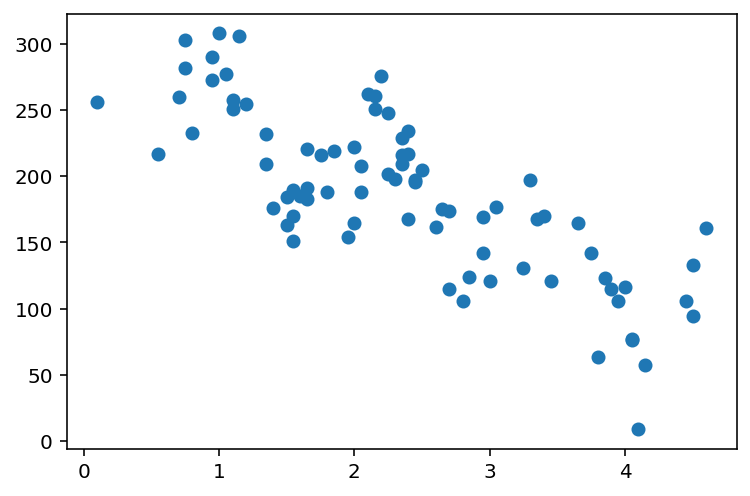

In [3]:
# x축에는 used_years, y축에는 price를 입력

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

#그림을 통해 상관관계를 파악할 수 있음 (음의 상관관계)

## 상관관계
---
이렇게 한 변수가 커짐에 따라 다른 변수가 작아지는 관계인 경우, 두 변수는 '상관 관계가 있다'고 하고, 그 관계된 정도는 **'(Pearson) 상관 계수'**로 표현할 수 있습니다.

상관계수의 크기에 대해 가장 잘 나타낸 이미지는 다음 이미지입니다.
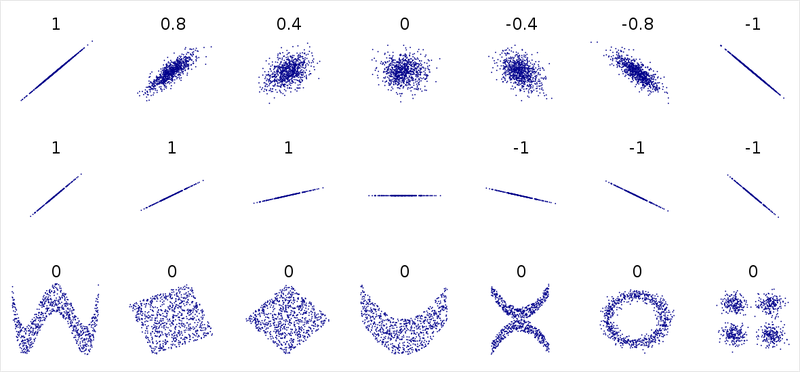

* 각 이미지 위에 써있는 숫자가 바로 상관계수 값인데, 상관계수 값은 -1에서 1 사이의 값을 가집니다.  
* 즉, 데이터 분포의 기울기가 양이라면 상관계수도 양의 값이고, 기울기가 음이라면 상관계수도 음의 값입니다.  
* 상관계수가 양이라면 두 변수는 '양의 상관관계', 음이라면 '음의 상관관계'를 가진다고 할 수 있습니다.

위 이미지의 첫 번째 줄에서 볼 수 있듯, 데이터의 분포가 직선에 가까울수록 상관계수 값은 -1 또는 1에 가까워집니다.  
즉, 두 변수 간에 한 변수가 커짐에 따라 다른 변수가 커지거나 작아지는 상호 관계성이 강할수록 상관계수의 절대값이 커지죠.  
반면, 데이터의 분포가 넓게 퍼지며 원에 가까워질수록 상관계수의 값은 0에 가까워집니다.  
아예 원 모양으로 동그랗게 퍼진다면 두 변수간에 어떠한 상관 관계도 없다고 볼 수 있는 거죠.  

단, 여기에서 주의해야 할 것은 이미지의 두 번째 줄입니다. 두 번째 줄에는 데이터의 분포는 직선이지만 각각의 기울기가 다릅니다.
하지만 _상관계수는 '기울기'를 이야기하는 것이 아니라_ 두 변수 간에 **한 변수가 변함에 따라 다른 변수의 값이 어떻게 변하는지에 대한 '상호적인 관계의 정도'를 나타내는 것**이기 때문에, **기울기가 급하든 완만하든 데이터의 분포가 직선에 가깝다면 상관계수는 항상 1 또는 -1에 가까워진다**고 할 수 있습니다.  

이 차이는 헷갈릴 수 있는 개념이기 때문에, 확실하게 이해하고 넘어가는 것이 좋습니다.  

이미지의 마지막 줄에는 **데이터 분포가 분명히 어떤 '패턴'을 가지고 있지만, 양 또는 음의 상관관계를 가지는 것은 아니기 때문에 상관계수는 0입니다.  
이 또한 상관관계와 상관계수는 두 변수 간의 패턴을 나타내는 것이 아닌, 각 값의 증가 또는 감소에 대한 관계만을 나타내기 때문**이라고 할 수 있습니다.

상관관계를 이야기 할 때 항상 언급되는 친구같은 개념은 **인과관계**입니다.  
상관관계와 인과관계의 차이는 오늘 내용에서는 벗어나기 때문에 깊게는 다루지 않겠습니다만, 궁금하시다면 다음 글 중 **'오류의 예'** 파트를 읽어보세요!
https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EC%99%80_%EC%9D%B8%EA%B3%BC%EA%B4%80%EA%B3%84

## 상관계수 구해보기
---
상관관계가 있다면, 상관계수 값은 얼마정도인지 확인해 보지 않을 수 없겠죠.  

통계학 또는 데이터사이언스에서 가장 많이 쓰이는 라이브러리인 **numpy 에서는 상관계수를 보여주는 corrcoef() 라는 함수**를 제공합니다.  
상관관계를 확인하고 싶은 두 변수가 있다면 np.corrcoef(x, y) 형태로 넣어주면 됩니다.

In [4]:
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

변수가 두 개이기 때문에 2x2의 행렬로 나타남.  
대각선에 해당하는 (0, 0) 위치와 (1, 1) 위치는 각각 첫 번째 변수와 첫 번째 변수, 두 번째 변수와 두 번째 변수끼리의 상관계수를 나타내기 때문에 항상 1이 됩니다.  
왜? 자기 자신과의 상관계수를 나타내기 때문!  

(0, 1)과 (1, 0) 위치에는 첫 번째 변수와 두 번째 변수 간의 상관계수가 나타났네요.  
약 -0.79로 강한 음의 상관계수가 보입니다. 이는 분명 두 변수 간에 강한 상관관계가 있음을 나타내는 거죠!

## "모델"을 만든다는 것, 그 의미 이해하기
---
> 회귀 분석의 시작, 일차함수 모델을 그려보고 그 의미 알아보기  

우리는 사용연수인 used_years 값을 입력받으면 중고가격이 얼마정도에 해당할지, 그 값을 잘 예측하는 모델을 만들어볼 수 있을까요?  

### 모델(model)이란?
--- 
**'모델(model)'** 이라는 용어를 사용하였는데, 모델은 **'특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'**로 이해할 수 있습니다.  
여기에서 또다시 '함수' 라는 용어가 나왔습니다. 중고등학교 수학에서는 함수를 '입력값을 받아 특정 연산을 행한 값을 출력하는 것' 정도로 배웠었죠.  

지금 우리에게 x와 y는 각각 어떤 것들이 될까요?  

풀고자 하는 문제가 무엇인가?  
우리가 하고자 하는 목적을 다시 정리해 봅시다. 우리는

- 사용 연수를 입력받아서,
- 중고가를 예측  
하는 문제를 풀려고 합니다.  
따라서 우리의 입력은 사용 연수가 될 것이고, 모델이 사용 연수를 입력받으면 그 정보에 따라 적당한 중고가를 예측해서 출력하면 되겠군요.

In [5]:
#입력인 x에 used_years, 출력인 y에 price 입력
x = macbook["used_years"].values
y = macbook["price"].values

### 일차 함수 모델
---
뒤에서 이 일차 함수가 어떤 의미를 갖는 모델인지 더 자세하게 알아볼 테지만, 지금은 그저 모델이 '기울기'가 있고 'y절편'이 있는 일차 함수 형태라는 것만 이해하면 무리가 없습니다.  

다만, 중고등학생 때 했던 것과는 다르게 기울기를 w, y절편을 b라고 두겠습니다.  
이 알파벳들은 머신러닝 분야에서 굉장히 많이 쓰이는 표기법이니 기억해두면 좋습니다!  

파이썬에서 일차함수를 만드는 것은 다음과 같이 함수로 구현하면 간단하죠!  
다음 함수는 x와 함께 기울기, y절편을 같이 입력받은 후 x에 기울기를 곱하고 y절편 값을 더해서 y를 연산해낸 후 그 값을 출력합니다.  

In [6]:
def model(x, w, b):
    y = w * x + b
    return y

#y = 2x + 1의 함수에 x=5를 넣어봅시다. 
#예상 출력값은 5 × 2 + 1 = 11이네요!

model(x=5, w=2, b=1) #11출력

11

### 모델 학습이란?
--- 

자, 그러면 이제 모델을 "학습", 혹은 "훈련(training)" 이라고 말하는 단계로 넘어갑니다.  
잠깐, 우리는 일차함수를 사용하는 것 뿐인데, 학습을 시킨다는 것은 무엇이고 또 어떻게 학습을 시킬 수 있는 걸까요?  

먼저, **모델을 학습시킨다는 것은 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "매개변수", 혹은 "파라미터" 를 찾는다**는 뜻과 같습니다.

이게 무슨 말이냐구요?! 정말 쉽게 이야기하자면, **"방정식을 푼다"** 는 것과도 일맥상통하는 말입니다!

자, 이렇게 생각해 봅시다. 우리에게 다음과 같은 두 가지 데이터가 있다고 하겠습니다.  

- 사용연수가 2년인 맥북의 중고가: 100만 원
- 사용연수가 5년인 맥북의 중고가: 40만 원  
만약 이 두 가지의 데이터가 있고, 세상의 모든 맥북의 중고가가 위와 정확히 일치하는 일차함수에 따라 결정된다고 하면 이 방정식을 어떻게 풀 수 있을까요?  
다음과 같은 과정으로 간단히 연립방정식을 통해 풀 수 있겠죠.

구하고자 하는 방정식을 y=wx+b 라고 하자.  
첫 번째 데이터에 따라, 100 = w × 2 + b 라는 식을 세울 수 있다.  
두 번째 데이터에 따라, 40 = w × 5 + b 라는 식을 세울 수 있다.  
두 식을 통해 하단의 식과 같은 연립방정식을 세울 수 있다.  
간단한 연립방정식 풀이를 통해 w=-20, b=140, 즉 y = -20x + 140 이라는 방정식을 구할 수 있다.  

네, 위와 같이 w와 b를 구하는 것은 아주 간단합니다!  
이렇게 방정식을 풀어 올바른 일차함수를 구한 후에는 새로운 데이터가 들어오더라도 그 중고가가 얼마인지 바로 구할 수 있게 됩니다.  

위에서 구한 함수와 우리에게 있는 (2, 100), (5, 40), (6, 20) 세 가지 점을 그래프로 그려보면 다음과 같습니다.

In [ ]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9) #구간 시작점, 구간 끝점, 구간 내 숫자 개수 
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y) #y값을 입력하여 그래프를 그림

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)
#산점도 (Scatter plot)는 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
#s=area, c=colors

plt.show()

### 오차를 최소화하는 모델
---
하지만 사실 우리는 현실에서 이렇게 문제를 풀 수 없습니다 😭  

데이터는 이쁘게 일직선 위에 존재하지 않습니다.  
저 모든 점을 지나는 일직선이란 안타깝게도 이 세상에 존재하지 않죠.  
즉, 우리가 중고등학생 때 풀었던 연립일차방정식같은 문제는 현실세계에는 맞지 않습니다.  

사실 위의 데이터도 현실세계에서는 아주 간단한 데이터일뿐, 현실 데이터는 이보다도 훨씬 복잡하기 때문에 나의 데이터에 정확히 맞는 '함수'를 찾는 것은 거의 불가능합니다.  

하지만 그럼에도 불구하고 우리는 어느 정도의 오차가 있더라도 적절한 값을 예측할 수 있는 모델을 찾기를 바랍니다.  
완벽하지 않더라도 최대한 잘 맞는, 그런 함수 또는 모델을 찾고 싶은 거죠!  

그러면 위와 같은 데이터를 최대한 잘 맞출 수 있는 일차함수를 찾는다면 어떤 함수를 생각해 볼 수 있을까요?  
다음과 같은 직선을 찾을 수 있다면 좋을 것 같군요.  

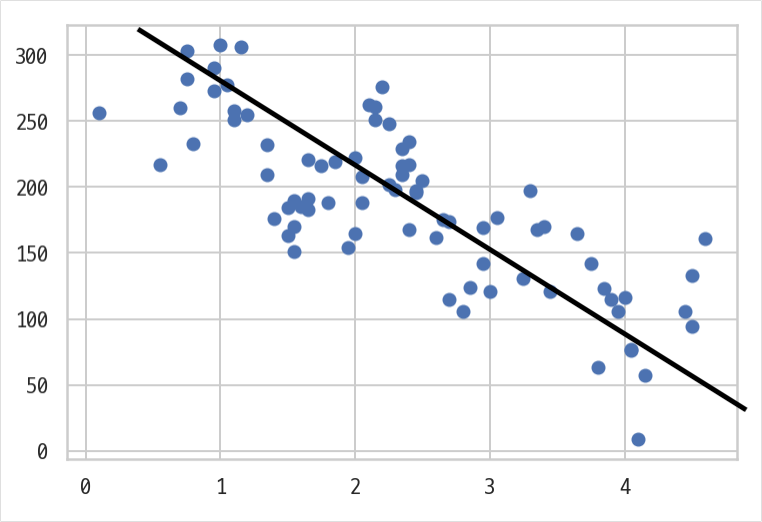

위 그림에서 직선은 제가 적당히 모든 데이터의 중앙 정도에 위치하도록 그려본 직선입니다.  
함수의 방정식을 정확히 알고 그린 것이 아닌, 2차원 좌표에 찍힌 데이터들을 보고 대략적으로 그린 것이기 때문에 아직 저 함수의 기울기와 y절편이 무엇인지는 모르죠.  

그것을 찾아내는 것이 바로 우리의 목표입니다!  
모든 데이터를 정확히 맞출 수는 없지만, 최소한의 오차를 낼 수 있는 그런 함수를 찾는 것 말입니다.  

정확히는 **y=wx+b라는 함수에서 위와 같이 최적의 직선이 될 수 있는 w와 b값을 찾는다는 의미**가 되겠습니다.
여기에서 우리가 찾아야하는 **w와 b같은 값을 보통 "매개변수" 또는 "파라미터", 또는 "가중치"** 라고 합니다.

위 세 가지 용어는 모델이 데이터를 학습해 나감에 따라 업데이트되는 값들을 칭하는 용어입니다. 이 단어들은 아주 보편적으로 많이 쓰이니 정확한 의미를 기억해두시길 바라요!  


## 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기
---
> 정확한 방정식을 구할 수 없는 현실 세계의 데이터에 대해 예측할 수 있는 모델을 찾기 위한 손실함수의 개념 알아보기

### "최적의" 함수는 어떻게 찾을 수 있을까?
--- 

자, 그러면 우리는 이제 "정답" 함수는 아니더라도, 최소한의 오차를 낼 수 있는 "최적의" 함수를 찾아야 한다는 것을 알았습니다.  


참, 이쯤 되면 눈치채셨겠지만, 이제 우리는 **"모델"이라는 단어와 "함수"라는 단어의 본질이 같다는 것을 이해**할 수 있습니다.  

그런 만큼 사실 위 질문에 대한 답은 아주 어려워질 수도 있습니다. 지금도 각 문제와 데이터셋에 맞는 "최적의 함수"를 찾기 위해 전세계의 머신러닝 연구자들이 고심하고 있답니다  

우리는 단계적으로 나아가는 과정에 있으니, 가장 간단한 방법으로 최적의 함수, 그 중에서도 최적의 "일차함수" 를 찾는 방법을 먼저 배워볼 것입니다.  

우리는 위에서 살펴봤던 것처럼 마법처럼 연립방정식을 풀어서 정확한 w와 b 값을 딱! 하고 구할 수 없습니다.  
따라서 <u>우리는 한 번에 정답을 찾기보다, 처음에 아주 랜덤한 값으로부터 시작해서 점차적으로 최적의 w와 b 값을 찾아나가는 방법</u>을 택할 것입니다.  

최적의 값을 찾아나가기 위해서 우리는 **손실함수** 라는 한 가지 새로운 지표를 설정합니다.  
바로 **"아직 불완전한 현재의 모델이 출력하는 값과 실제 정답 간의 차이"** 를 확인하는 거죠.  

완벽한 정답함수는 존재하지 않더라도, 모델의 출력값과 실제 정답 간의 차이를 계산할 수 있고, 그 값을 점차 줄여나갈 수 있다면 우리는 점차 최적의 함수에 가까워질 수 있겠죠.  
따라서 우리는 먼저 **1) 모델이 출력하는 값과 실제 정답 간의 차이를 계산하고, 2) 그 차이를 단계적으로 줄여나가는 순서로 모델을 학습시켜 나갈 것** 입니다.

### 예시를 통해 이해하기
---

예를 들어, 현재 아직 불완전한 모델이 다음과 같다고 해 보겠습니다.

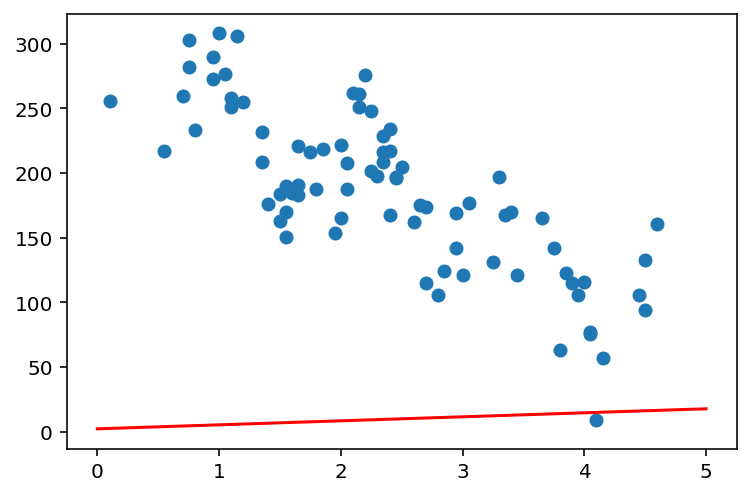

In [7]:
#랜덤한 초깃값
w = 3.1
b = 2.3
#y=3.1x+2.3

#그래프 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

전혀 맞지 않음 -> 현재 모델이 얼마나 틀린 값인지 확인하자.    

데이터 중 used_years의 값을 불러옴  

이 데이터를 모델에 넣어서 모델이 출력하는 값을 prediction에 담아보자.

In [9]:
#x값 확인
x = macbook["used_years"].values
x

#prediction ; 각각의 y값에는 x를 입력받은 후 현재 w, b에대해 계산해 출력한 값이 저장됨
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

#이 값을 macbook 데이터 프레임에 넣어 실제값과 얼마나 다른지 확인
macbook['prediction'] = prediction
macbook.head()
#실제 정답인 price와 매우 큰 차이가 남 -> 아직은 멍청한 모델이라

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


### 정답과 예측값 간의 차이
---

우리는 모델에게 "너가 이만큼 틀리고 있어!" 라는 것을 알려줄 것입니다. 그 정보를 바탕으로 모델이 조금씩 개선을 해나갈 수 있는 방법이 있거든요!  
그렇다면 모델이 얼마나 틀렸는지는 어떻게 평가할 수 있을까요?  

당연히 **"정답과 예측값 간의 차이"** 를 생각해 볼 수 있겠습니다.  
그렇다면 price와 prediction의 차이인 error 컬럼을 새로 만들어보겠습니다.  

In [10]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


이 값을 바로 사용해도 되지만, 우리는 특별히 error를 제곱해서 모델의 오차를 측정할 것입니다.  
제곱을 사용하는 방법 외에도, 에러의 절댓값 등을 사용하는 방법도 있습니다.  

에러의 종류는 다음 글에서 간단히 살펴보겠습니다.
https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html

글에선 "모델이 얼마나 틀렸는지를 평가하는 지표"로 네 가지를 소개합니다. 각각은 무엇인가요?
> * MAE(Mean absolute error) : 실제값과 예측값간의 차 절대값의 평균 (오차의 절댓값의 평균)  
> * MSE (Mean Squared Error) : 실제값과 예측값간의 차 제곱평균 (오차의 제곱의 평균)  
> * __RMSE (Root Mean Squared Error) : MSE의 루트값 제일 많이 쓰임__
> * R-squared (Coefficient of determination) : 평균값과 비교하여 예측값이 얼마나 잘 맞는지 확인. 0~1사이 값이며, 값이 클수록 잘맞는 것.(결정계수)  
> 아래 그림으로 확인하는게 더 빠름

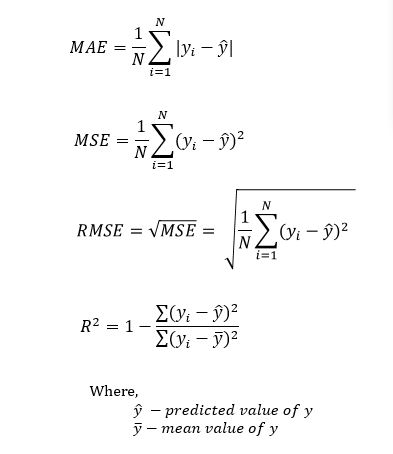

In [11]:
#RMSE 값 구하기
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

#실제 prediction값과 y간의 차이 알아보기
#모델에 x,w,b를 입력해 predictions 구하기
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

#RMSE() 함수에 prediction, y 넣어서 둘사이 RMSE값 구하기
rmse = RMSE(predictions, y)
rmse
#모델이 부정확하여 RMSE값 크게 나옴

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


188.81322969819274

### 손실함수(비용함수)
---

이렇듯 **모델의 예측값과 정답값에 대한 차이를 계산하는 함수를 손실함수(loss function), 또는 비용함수(cost function)** 라고 부릅니다.  
현재 모델이 **얼마나 손실을 내고 있는지 나타낸다**는 개념으로 이해할 수 있습니다.  

즉, 손실값(loss)이 크다는 것은 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 손실값이 작다는 것은 모델이 정답에 가까운, 올바른 예측을 하고 있다는 것으로 해석할 수 있습니다. 따라서 손실값은 작을수록 좋습니다.  

그러면 우리의 손실함수를 RMSE를 활용해 다음과 같이 정의하도록 하겠습니다.    


손실함수는 **"모델이 예측하는 출력값과 정답값 간의 거리를 나타내는 함수"** 라고도 할 수 있습니다.
현재 모델이 예측하는 값과 정답이 얼마나 멀리 떨어져있는지를 계산하는 함수이기 때문이죠!

손실함수와 비용함수 또한 머신 러닝 모델의 학습 과정에서 굉장히 중요한 개념이므로 꼭 그 정확한 개념을 기억하고 있는 것이 좋습니다!

그렇다면 이제 rmse값, 즉 우리 모델의 손실함수값을 줄여나가야겠죠.
다음 단계에서 그 방법에 대해 알아보겠습니다.

In [ ]:
#손실함수 정의
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

## 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 되겠지!
--
>손실함수값을 점차적으로 줄일 수 있는 경사하강법에 대한 개념과 구현 알아보기  

### 기울기와 경사하강법(Gradient Descent)
---
자, 모델이 현재 얼마나 틀리고 있는지를 계산하는 손실함수에 대해서도 알아보았으니, 우리는 그 값을 줄이기만 하면 됩니다.

그런데 이 값을 어떻게 줄여나갈까요?

자, 위에서 우리가 정의했던 손실함수를 다시 한 번 살펴보겠습니다.

Q5. 위의 손실함수의 입력값인 x, w, b, y 중 최종 출력값인 loss 가 줄어들도록 우리가 직접 수정할 수 있는 값은 무엇인가요?  
- x,y는 주어진 값으로 수정할 수 없음 -> 따라서 w, b를 통해서 변경할 수 있음 -> 이것을 "파라미터" 혹은 "가중치"라고 함.   


아래부터는 매우 단순화 하여, 최적의 b를 찾았다는 가정 하에 w 변수에만 집중해 설명하겠습니다.  
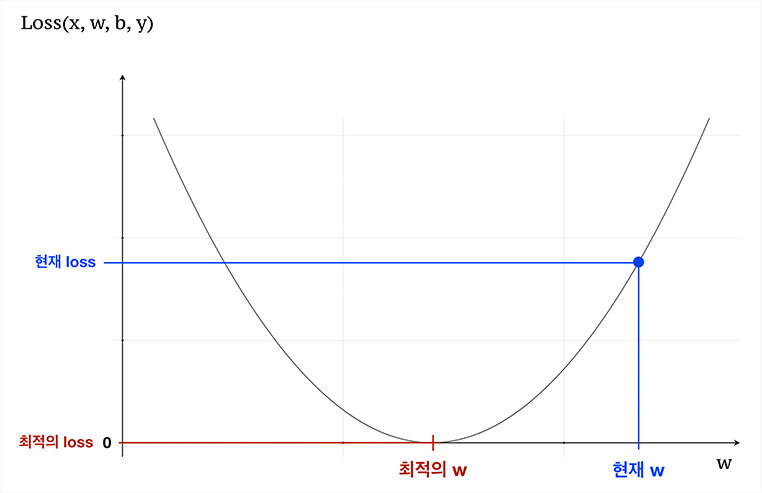

위 그래프의 x축은 w이고, y축은 손실함수의 함수값, loss값입니다. 즉, 위 그래프는 **"w 값에 따른 손실함수" 그래프를 그려놓은 것**이죠.  

이미 그림에도 표시가 되어 있듯이, 우리가 정말 원하는 것은 손실함수의 값이 0이 되는 것, 아니면 최소한 0에 가까운 작은 값이 되는 것을 바랍니다.  
즉, 최적의 w는 빨간색으로 표시가 되어있는, 가장 작은 loss 값을 만들어내는 w 값이죠.  

하지만 우리는 처음부터 최적의 w를 알지 못하기 때문에, 랜덤으로 w를 아무렇게나 선택했고, 결과적으로 파란색에 위치한 것처럼 현재의 loss 값은 매우 큽니다.  


그렇다면 우리는 어떻게 현재의 w를 최적의 w로 옮길 수 있을까요?    


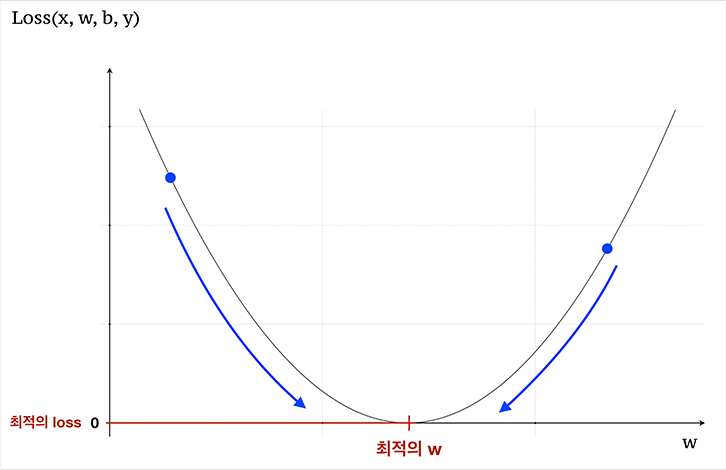

위 그림과 같이 두 가지 상황을 생각해 볼 수 있습니다.  

만약 현재의 w가 최적의 w의 왼쪽 에 위치하고 있다면 현재의 w가 최적의 w보다 작다는 의미이므로 우리는 현재의 w가 커지도록 늘려야 합니다.  
반대로 오른쪽 에 위치하고 있다면 현재의 w 값이 최적의 w 값보다 크다는 의미이므로 현재의 w 값이 작아지도록 줄여야 합니다.  
간단하죠?! 바로 이 아이디어만 있으면 우리는 점차적으로 현재의 w 값을 최적의 w에 가까워지게 만들어나갈 수 있습니다!  


하지만 여기서 또 한 가지 문제가 있습니다. (😱..ㅎ)  

바로 여전히 우리는 **최적의 w 값이 무엇인지를 모르기 때문에, 현재 w 값 또한 최적의 w보다 큰지 혹은 작은지를 알 수 없다 는 점입니다.  
현재 w 값은 3.5인데! 최적의 w가 3.5보다 클 것이냐, 작을 것이냐, 이것을 모르는데 어떻게 값을 옮기냐구요!  

그래서! 여기에서 아주 편리하고도 (개인적으로는 매우 영리한 방법이라고 생각되는) 도구를 하나 사용합니다.  

이미 들어보셨을 수도 있을, 바로 그 유명한 **"기울기", 혹은 "그래디언트"** 라고 불리는 친구를 사용하는 것이죠.  

위 그림의 왼쪽 점과 오른쪽 점에서 각각 기울기를 그려보도록 하겠습니다.  

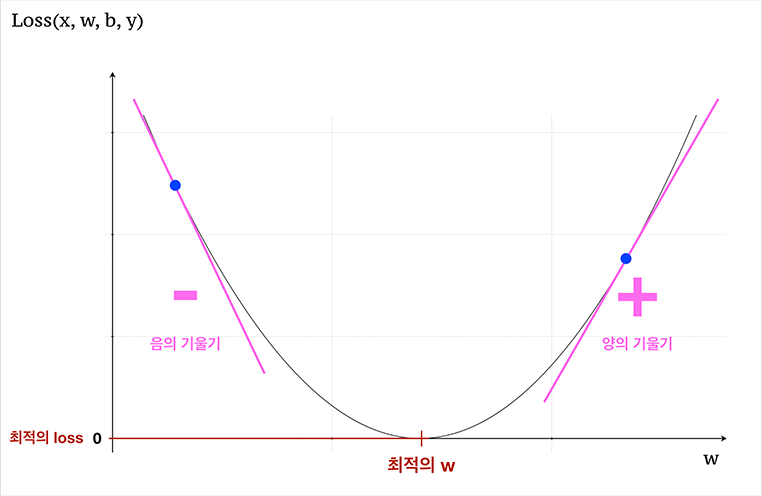

- 왼쪽 점은 자기 자신의 위치보다 **오른쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 오른쪽 아래로 향하는 방향** 이고, 그 기울기는 **음수** 입니다.
- 오른쪽 점은 자기 자신의 위치보다 **왼쪽으로 갈수록 손실함수값이 점점 작아지기 때문에 그 점에서 그린 접선은 왼쪽 아래로 향하는 방향** 이고, 그 기울기는 **양수** 입니다.  


자, 이렇게 특정 점에서의 기울기는 항상 자기 자신보다 함수값이 작아지는 방향 을 알려줄 수 있습니다.    
최적의 w가 어디에 있고, 현재 내 위치가 최적의 w보다 오른쪽인지, 왼쪽인지 알지 못하더라도 현재 내 위치에서의 기울기만 알 수 있다면 내 위치를 어느 방향으로 옮겨야 하는지를 알 수 있게 되는 것이죠.    

따라서 우리는 기울기를 활용해서 다음과 같은 규칙으로 w를 업데이트 하면 됩니다!

1. 현재 w에서의 기울기를 구한다.
2. 기울기가 음수라면, 현재 w를 키운다.
3. 기울기가 양수라면, 현재 w를 줄인다.
이러한 규칙을 깔끔하게 수식으로 나타내면 다음과 같습니다.



w' : 새로운 w
w : 현재 w
taη : 얼마나 업데이트를 할 지를 결정하는 상수 (학습률)
g : 기울기, 또는 


바로 이해가 안 되더라도 괜찮습니다. 어떤 방식으로 w'w를 효과적으로 업데이트하는지 살펴보죠.

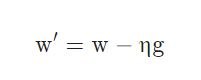

여기에서 \etaη 는 고정되어 있는 상수로써 ww를 변화시키는 양을 조절하는 역할을 합니다.
즉, w-\eta gw−ηg 에서 gg는 키울지, 줄일지에 대한 "방향과 크기"를, \etaη는 얼마나 키울지/줄일지에 대한 "배율"을 결정하는거죠.

이렇게 \etaη와 gg, 두 가지 값으로 우리는 ww를 계속 업데이트 해나갈 수 있습니다!
조금씩 키우거나, 줄여나가면서 우리는 점점 최적의 ww에 가까워질 수 있겠네요 👍

이렇게 기울기를 사용해서 점차적으로 매개변수를 업데이트 하는 방식을 Gradient Descent Method, 즉 경사하강법 이라고 합니다.
이 방법 또한 매우 보편적으로 쓰이는 방법 중 하나이니 꼭 기억해두시길 바라요!

### 미분으로 경사 구하기
다시 돌아와서, 기울기 구하는 함수 구현하기. 직접 기울기를 계산하지만, 앞으로는 텐서플로우등을 통해 빠르고 간편한 코드로 기울기 구할 것.  

기울기 혹은 미분계수의 정의? https://ko.wikipedia.org/wiki/%EB%AF%B8%EB%B6%84  
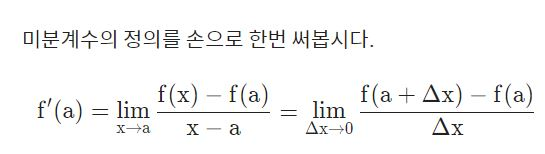

우리는 두 번째 수식 정의를 사용해서 기울기를 계산하는 함수를 구현합니다.  
실제로는 극한을 사용해서 Δx 가 0에 무한히 가까워져야 하지만, 값을 구하는 데에는 충분히 작은 값이라면 충분하기 때문에 우리는 Δx를 0.0001로 두고 계산하겠습니다.  

이렇게 수학적으로 정확한 값은 아니지만 근사한 미분계수 값을 찾는 방법을 **수치미분** 이라고 합니다.  

위에서 설명을 할 때에는 w에 관해서만 했지만, 실제로 우리가 업데이트 해주어야 하는 변수는 w와 b, 두 가지가 있습니다.  

두 가지의 기울기를 모두 계산하는 gradient 함수는 다음과 같습니다.  

다음 함수는 x, w, b, y를 입력받아서 손실함수값을 계산한 후, w와 b 각각에 대한 기울기를 계산합니다.  
손실함수값을 계산하는 과정에 x, w, b를 모델에 넣어서 prediction을 출력하고 그 값과 y를 비교하는 과정까지 모두 들어있습니다.  

In [ ]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

## 한 번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!
---
> 정의된 손실함수와 기울기 함수로 모델을 학습시켜 최적화하기

자, 이제 손실함수와 기울기가 모두 준비되었으니 우리는 단계별로 최적의 w와 b에 접근하며 최적의 모델, wx+b를 찾아내기만 하면 되겠군요.  

### 하이퍼 파라미터
---

먼저 경사하강법에서 필요했던 학습률, η 상수를 정의하고 시작하겠습니다.

LEARNING_RATE = 1  

학습률은 1이 아니어도 됩니다. 어떤 학습률을 사용하는 것이 가장 좋은지는 실제로 실험을 해 보기 전까지는 모릅니다.  
이렇게 학습률과 같이 **모델이 스스로 학습해나가는 파라미터 가 아니라, 사람이 직접 사전에 정하고 시작해야 하는 파라미터 를 하이퍼 파라미터** 라고 합니다.  

실제 모델의 성능을 끌어올리기 위해서는 최적의 하이퍼 파라미터를 찾는 것 또한 매우 중요합니다.  
최적의 하이퍼 파라미터는 사람이 직접 찾아야 하기 때문에 많은 실험을 통해 찾을 수밖에 없습니다.  

아무튼, 우리는 간단한 실험을 할 예정이니 학습률을 적당히 1로 설정하고 시작해 보겠습니다.  
사실 복잡한 데이터셋에서는 보통 학습률을 0.0001 ~ 0.01 정도의 작은 값으로 사용합니다.  

#### 이제는 다음 순서대로 코드를 구현하기만 하면 됩니다!

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w' = w - ηg , b' = b - ηg 로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복  

### 모델 최적화
---

In [1]:
# 1. x, y 데이터 준비하기
x = macbook["used_years"].values
y = macbook["price"].values

#2. 초기 가중치값 랜덤으로 설정
w = 3.1
b = 2.3
w, b

#손실함수값이 단계별로 어느정도인지 확인하기 위한 빈 리스트 준비
#-> 학습이 어떤 식으로 진행되는지 확인하는 것이 중요함
losses = []

# 여려번 반복
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  
        #학습반복하며 loss값이 효과적으로 떨어지는 것을 확인

#loss list를 통해 그래프 확인
plt.plot(losses)
plt.show()
#1000이후로 거의 최적에 도달하여 값변화 거의 X

#현재 x, b값 확인
w, b


#원래 데이터와 학습이 완료된 모델,일차함수 그려보기
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

NameError: name 'macbook' is not defined

## 신규 데이터에 적용해보기
---

In [ ]:
#신규 맥북_테스트 데이터
test = pd.read_csv("~/aiffel/bike_regression/data/macbook_test.csv")
print(test.shape)
test.head()

#test_x, test_y에 담기
test_x = test['used_years'].values
test_y = test['price'].values

#모델에 test 값 넣어서 test_prediction 구하기
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

#error를 직접 계산하여 새로운 칼럼으로 넣기
test['error'] = test['price'] - test['prediction']
test

#RMSE 값 구하기
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

## 다양한 정보로 원하는 값을 예측해 보기
---
> 다변수 선형회귀를 사용하기  
(다변수 데이터에 대해 선형회귀를 하기 위한 데이터를 확인하고 모델 설계하기)  


**seaborn**은 matplotlib과 비슷하게 **데이터에 대한 시각화를 제공하는 패키지로, 간단하고 가벼운 그래프에 최적화 되어있는 matplotlib과 달리 시각화 자체의 기능을 더 살려서 예쁘고 다양한 형태의 그래프를 그릴 수 있도록 만들어진 패키지**입니다.

In [3]:
import seaborn as sns

sns.get_dataset_names()

#이 중 우리가 오늘 사용해 볼 팁 데이터는 sns.load_dataset("tips")

tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()
#(244, 7)

#하지만 여기에 문자열 형태의 데이터가 있음. 하지만 우린 수식에 넣어 사용할 것.
#따라서 모든 데이터의 값이 실수여야함.
#판다스의 get_dummies() 함수 사용해 문자열 -> 0,1로 변경
#수식을 구할 때 카테고리형 데이터가 있다면 더미 변수(dummy variable)를 활용해 식에 포함시켜 줄 수 있음

import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

(244, 7)


,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


문자열 데이터는 모두 사라지고, 대신 sex_Male, sex_Female과 같이 각 카테고리에 대한 컬럼이 새롭게 만들어짐  

### 내가 가지고 있는 데이터 중 실수형 데이터가 아닌 카테고리 데이터일 때에는 pandas의 get_dummies 함수로 간편하게 숫자 데이터로 변환해줌  

이러한 데이터 변환 방식을 **원-핫 인코딩(One Hot Encoding)**  

우리는 나머지 모든 데이터를 가지고 최종적으로 tip 값을 예측하려고 합니다. 따라서 tip 컬럼을 맨 오른쪽에 두도록 하겠습니다.   


In [4]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


위 데이터를 보시면 각 행에는 total_bill부터 time_Dinner까지, 총 12가지의 정보가 있습니다.  
그리고 12가지의 정보로부터 결정된 팁의 가격, tip값이 있죠.  

우리는 모델을 어떻게 만들어볼 수 있을까요?  

입력 데이터가 "사용연수"로 단 한 개였을 때 우리는 모델을 다음과 같이 설정하였습니다.  

y = wx + b  


그렇다면 이번에는 x가 한 개가 아닌, 12개나 됩니다! 그렇기에 우리는 모델을 다음과 같이 설정해 볼 수 있죠.  

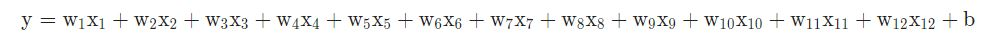  

우리가 입력데이터 x가 단 하나였을 때 사용했던 가중치는 x와 곱했던 w, 그리고 상수 b로 두 개였죠.  
이번에는 x 정보가 12개입니다. 따라서 같은 원리로 각 x값을 조정할 수 있도록 각각의 x에 각기 다른 w를 곱하고, 상수 b 는 단 하나를 더해주죠.  


### 선형 회귀
---

이러한 식을 우리는 **선형 방정식**이라고 합니다. 다른 말로는 **"다변수 일차방정식"** 이라고 할 수도 있죠.  

중요한 것은, 우리는 __각각의 x에 개별 가중치를 곱해주는 것 말고는 다른 조작을 하지 않는다__ 는 것입니다.  

이렇게 선형 방정식을 활용해서 원하는 값을 예측하는 모델을 설계하고 학습시키는 방법을 __선형 회귀__ 라고 합니다.  
선형 회귀는 __선형 방정식을 통해 회귀 문제를 푼다__ 는 의미가 담겨 있습니다.  

이 중 특히 회귀 라는 단어는 연속된 실수값을 예측하는 문제 를 뜻합니다.  
회귀와 대립되는 개념은 분류 인데, 다음 예를 보면 가볍게 이해가 되실 겁니다.  

- 사진을 입력받아 해당 사진이 강아지인지, 고양이인지 맞추는 문제는 분류 문제입니다.  
- 사용연수, 화면크기 등을 입력받아 실수값인 중고 가격을 맞추는 문제는 회귀 문제입니다.  


즉, __분류 문제는 맞추고자 하는 값이 카테고리__ 이고, __회귀 문제는 맞추고자 하는 값이 연속된 실수 값__ 입니다.  

### 시각화
---
 위에서 x축과 y축을 활용해서 2차원 평면에 데이터를 찍어서 시각화할 수 있었습니다.  

만약 입력 데이터인 x가 x1,x2로 두 개이고, 그 두 값으로 y값이 정해진다면 다음과 같은 3차원 공간에 시각화를 해 볼 수 있겠죠.  

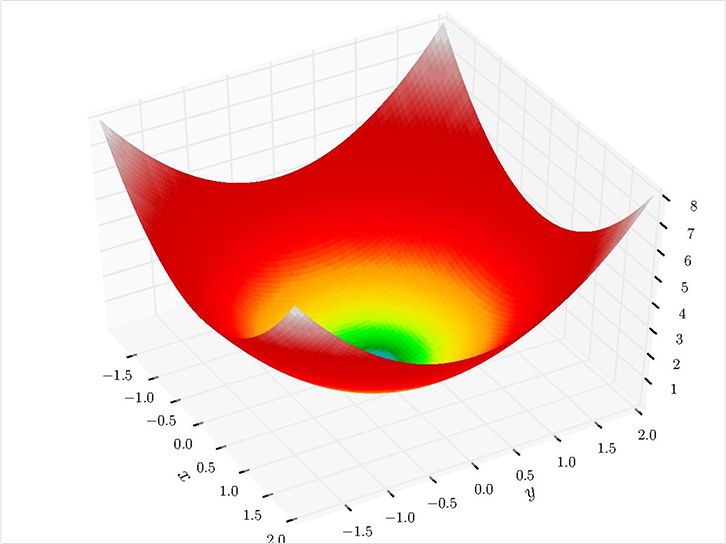  

하지만, 입력 데이터 x가 3개 이상으로 늘어난다면 우리는 더이상 시각화를 할 수가 없게 됩니다.  
우리 존재가 3차원 공간에 살고 있기 때문에, 4차원 이상은 상상할 수도, 그려볼 수도 없기 때문이죠!  

그렇기 때문에 2개 이상의 입력 변수가 있는 경우에는 데이터가 존재할 n차원의 공간을 어렴풋이 상상하며 최적의 함수를 찾을 뿐, 눈으로 확인할 수는 없습니다.  


### 표기법
---
일반적으로 x와 곱해지는 매개변수는 w로, 그리고 상수는 b로 표기합니다. 이 때 지금과 같이 x의 개수가 여러 개라면 w는 wn 과 같이 아래첨자로 숫자를 표기  

하지만 통일을 주기위해 b = w0으로 표현하기도함.

-> 상수 b를 없애는 대신 x0 = 0이라는 상수 x0식으로 표현하기도함. 

## 다시 한 번 직접 설계해 보는 손실함수
---
> 다변수 데이터에 대해 선형회귀를 하기 위한 손실함수를 정의하기  




In [7]:
#데이터 준비 (X는 12개의 값을 갖는 벡터이므로 대문자로 표기)
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

#train, test 데이터 분리하기 -> sklearn -> train_test_split사용

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#W와 b는 랜덤한 값으로 초기값을 설정해주도록 하겠습니다. 
#W 또한 벡터이므로 대문자를 사용
#길이가 12인 W와 1개의 숫자인 b를 준비

import numpy as np
W = np.random.rand(12)
b = np.random.rand()

#W, b값 확인
W
b

#for문을 활용하여 y = w1x1 + w2x2 + ~ + w12x12 + b 식 만들기
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#원래 RMSE를 해야하나 이번엔 MSE (RMSE에서 루트 빼면 됨)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

#loss 계산
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
     

(195, 12) (195,)
(49, 12) (49,)


## 앞으로는 절대 해 볼 일 없을, 직접 그래디언트 계산하기
---
> MSE Loss에 대해 미분 공식을 활용해서 직접 그래디언트 수식을 구하고 함수 구현하기  
  
앞에선 미분계수의 정의 식으로 기울기를 구했으나, 이번엔 수학적인 미분 공식 활용!  

미분해야할 손실함수 식 =   
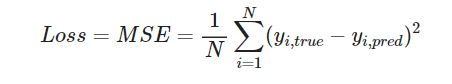  

 MSE 값은 정답 y와 예측한 y 간의 차이를 제곱해서 평균한 값이었습니다.  
모델이 잘 예측할수록 MSE 값은 작아지고, 예측을 잘 못할수록 커지는 값이죠.  

바로 미분하려고 했겠지만,,, 고민해봐야할 것이,  
무조건 x의 값으로 미분하는 상황과 다름  
-> 우린 어떤 변수로 미분해야하는가?   

- 우리가 손실함수를 미분하는 이유는 최적의 매개변수, w와 b에 가까워지는 방향을 알기 위함이었다. 
- 특정 순간에 기울기가 양수라면 w를 더 작게 줄이고, 기울기가 음수라면 w를 더 크게 늘린다.  
- 즉, 우리는 w' = w − ηg 공식을 활용해서 변수를 업데이트하는데, 이 때 기울기는 변수 업데이트의 방향을 결정하는 역할을 한다.  
- 따라서 손실함수는 언제나 내가 최적을 찾고자 하는 매개변수, 혹은 가중치에 대해 미분해야 한다.  
- 현재 모델에는 w1 부터 w12까지 12개의 w 와, 1개의 b가 있으므로 우리는 총 13개의 변수에 대해 미분을 해야 한다. 

우리는 총 13가지의 매개변수에 대해 손실함수를 13번 미분해야 하는군요.  
손실함수를 wi 에 대해 미분을 하면 다음과 같아지겠군요. 


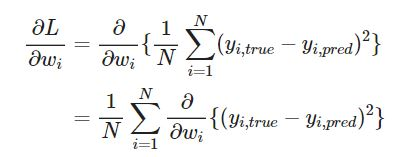

우리는 wi에 대해 미분하고 있으니, wi와 관계없는 1/N은 간단히 무시하고, 미분에 영향을 주지 않는 덧셈 연산인 ∑ 안으로도 넣을 수 있습니다.  
이제는 (yi,true − yi,pred)2을 wi로 미분하면 됩니다.  

그런데 여기서도 yipredic만 wi를 포함하는 함수일 뿐, yitrue 값은 wi와 관계없는 상수이기 때문에, 간단한 미분으로 볼 수 있습니다.  

간단한 모양의 식으로 바꿔보면, 
Δ(x−a)2 / Δx  
의 식은 어떻게 미분할까요?  

a는 x에 관계없는 상수이므로 다음과 같이 간단히 미분됨.  
Δ(x−a)2 / Δx  = 2(x-a)

정확히는 합성함수의 미분을 사용한 과정임.

Δ(x−a)2 / Δx  = 2(x-a) x {Δ(x−a) / Δx}  
= 2(x-a) x 1  
= 2(x-a)

그럼 최종적으로 우리가 손실함수에 대해 미분하고자하는 식은  


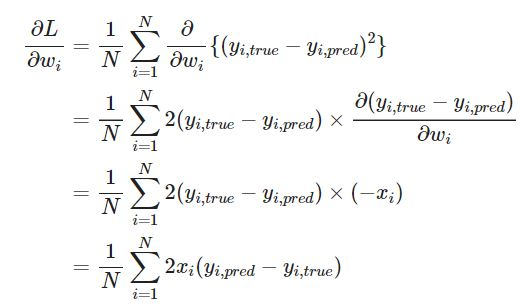

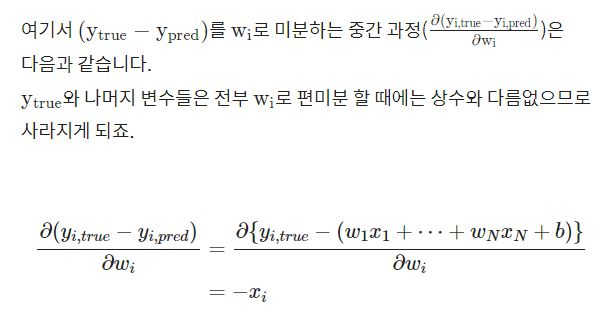

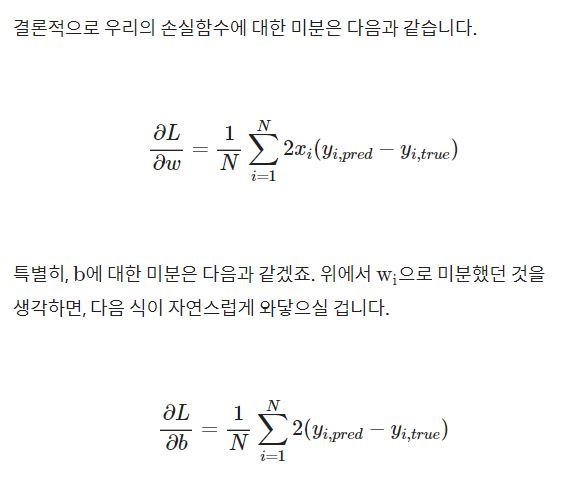

In [ ]:
#함수로 구현하기

def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

#시험삼아 경사 계산해보기
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)
#결과로 w1~w12까지의 12가지 기울기값과 b의 기울기를 효과적으로 구할 수 있음

## 모델 학습시키기
---
> 직접 구현한 손실함수, 기울기 함수를 활용해 경사하강법으로 모델 학습하기

In [ ]:
# 반복해서 가중치 업데이트하며 학습 진행하기.
# 학습률 0.0001

LEARNING_RATE = 0.0001

#gradient를 구하고, W와 b를 업데이트하고, 손실함수를 기록

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
#계산한 loss값 그래프로 확인        
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#w, b값 확인
W, b

#test 값에대해서 예측하기.
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

#prediction과 실제 정답인 y_test 값을 비교해보기. 
#X_test의 각 행의 첫번째 데이터가 total_bill이므로. 다음과 같이 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()
#x축에는 total_bill을, y축에는 각각 tip값과 prediction 값을 표시하였습니다.

## 지금까지 한 모든 과정을, 라이브러리로 깔끔하게
---
> 모델 설계, 손실함수 정의, 기울기 계산 및 최적화 과정을 sklearn으로 진행하기

사이킷런을 사용하면 모델이 학습하기 위한 손실함수, 기울기 계산을 직접할 필요가 없기 때문에 매우 간단하게 모델 학습이 완료됩니다.  

먼저 우리가 사용했던 데이터를 똑같이 준비해 봅시다.  

In [1]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]

# x, y 준비
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

#x, y를 train, test 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#준비된 모델 불러오기. 선형회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#이렇게하면 가중치 선언, 손실함수, 기울기 계산할 필요 없음......

#모델학습 시키기
model.fit(X_train, y_train)

#x_test 데이터의 예측값
predictions = model.predict(X_test)
predictions

#정답비교해 모델 성능 평가하기
#모델성능은 mse로 계산. -> sklearn에 있음
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse
#0.7 정도로 앞서 만들었던 0.68과 유사함

#x축에 total_bill, y축에 tip 넣고 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

NameError: name 'sns' is not defined

## 정리
---
우리가 풀어본 문제는 머신러닝 중에서도 "선형 회귀" 문제였습니다.  


사실 앞으로는 회귀 문제를 이렇게 풀지 않고 기울기나 모델 학습 과정은 텐서플로우에 내장된 편리한 함수들을 이용하게 될 것입니다.  
하지만, 이미 편하게 쓸 수 있도록 구현되어 있는 라이브러리를 사용할 때에도 내가 무엇을 하려고 이 라이브러리를 사용하고 있는지를 이해하고 쓰는 것과 아닌 것은 매우 큰 차이가 있죠!  


- 입력데이터인 X, 정답데이터인 y, 모델의 출력인 prediction, 각각의 개념을 알고, 정답데이터에 가까운 출력을 낼 수 있도록 학습한다는 철학을 이해해 보았고,
- 손실함수의 개념과 손실함수가 필요한 이유를 이해하고, 쓸 수 있는 함수의 종류를 알아보았으며 직접 구현해 보았습니다.
- 또한, 손실함수를 미분해서 구하는 기울기는 손실함수값을 줄이기 위해 필요한 것임을 이해하고, 그 구현을 수치미분과 해석미분 두 가지 방법으로 진행했죠.
- 그리고, 선형 방정식 형태로 된 모델을 학습시켜 실수형 데이터를 예측하는 선형 회귀 프로젝트의 전체 프로세스를 경험하고 익혀보았습니다.
- 마지막으로는 사이킷런을 활용해서 간편하고 빠르게 선형 회귀를 진행해 보기도 했어요!  

이 모든 내용을 완벽하게 소화했다고 느낀다면, 분명 앞으로 달리 보이는 것들이 있으실 겁니다!  
잘 이해가 안 되었던 수식 또는 내용이 있었다면 꼭 정리를 해 보고, 복습도 해 보시는 것을 권장드립니다.  

그러면 배운 내용을 토대로 프로젝트를 진행하고 마무리하겠습니다 👏🏼